In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_005.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_006.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_007.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_008.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_009.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_010.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_011.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_012.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_013.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_014.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_015.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alternaria\Alternaria_016.jpg
.\input\MangoFruitDDS\SenMangoFruitDDS_bgremoved\Alt

In [7]:
# Directory with our training horse pictures
a_dir = os.path.join('./input/MangoFruitDDS/SenMangoFruitDDS_original/Alternaria')

# Directory with our training human pictures
b_dir = os.path.join('./input/MangoFruitDDS/SenMangoFruitDDS_original/Anthracnose')

# Directory with our training horse pictures
c_dir = os.path.join('./input/MangoFruitDDS/SenMangoFruitDDS_original/Black Mould Rot')

# Directory with our training human pictures
d_dir = os.path.join('./input/MangoFruitDDS/SenMangoFruitDDS_original/Healthy')

# Directory with our training horse pictures
e_dir = os.path.join('./input/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot')

In [8]:
a_names = os.listdir(a_dir)
print(a_names[:10])
b_names = os.listdir(b_dir)
print(b_names[:10])
c_names = os.listdir(c_dir)
print(c_names[:10])
d_names = os.listdir(d_dir)
print(d_names[:10])
e_names = os.listdir(e_dir)
print(e_names[:10])

['alternaria_001.jpg', 'alternaria_002.jpg', 'alternaria_003.jpg', 'alternaria_004.jpg', 'alternaria_005.jpg', 'alternaria_006.jpg', 'alternaria_007.jpg', 'alternaria_008.jpg', 'alternaria_009.jpg', 'alternaria_010.jpg']
['anthracnose_001.jpg', 'anthracnose_002.jpg', 'anthracnose_003.jpg', 'anthracnose_004.jpg', 'anthracnose_005.jpg', 'anthracnose_006.jpg', 'anthracnose_007.jpg', 'anthracnose_008.jpg', 'anthracnose_009.jpg', 'anthracnose_010.jpg']
['aspergillus_001.jpg', 'aspergillus_002.jpg', 'aspergillus_003.jpg', 'aspergillus_004.jpg', 'aspergillus_005.jpg', 'aspergillus_006.jpg', 'aspergillus_007.jpg', 'aspergillus_008.jpg', 'aspergillus_009.jpg', 'aspergillus_010.jpg']
['healthy_001.jpg', 'healthy_002.jpg', 'healthy_003.jpg', 'healthy_004.jpg', 'healthy_005.jpg', 'healthy_006.jpg', 'healthy_007.jpg', 'healthy_008.jpg', 'healthy_009.jpg', 'healthy_010.jpg']
['lasio_001.jpg', 'lasio_002.jpg', 'lasio_003.jpg', 'lasio_004.jpg', 'lasio_005.jpg', 'lasio_006.jpg', 'lasio_007.jpg', 'lasio

In [9]:
print('total Alternaria images:', len(os.listdir(a_dir)))
print('total Anthracnose images:', len(os.listdir(b_dir)))
print('total Black Mould Rot images:', len(os.listdir(c_dir)))
print('total Healthy images:', len(os.listdir(a_dir)))
print('total Stem end Rot images:', len(os.listdir(a_dir)))

total Alternaria images: 170
total Anthracnose images: 132
total Black Mould Rot images: 186
total Healthy images: 170
total Stem end Rot images: 170


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 10
ncols = 4

# Index for iterating over images
pic_index = 0

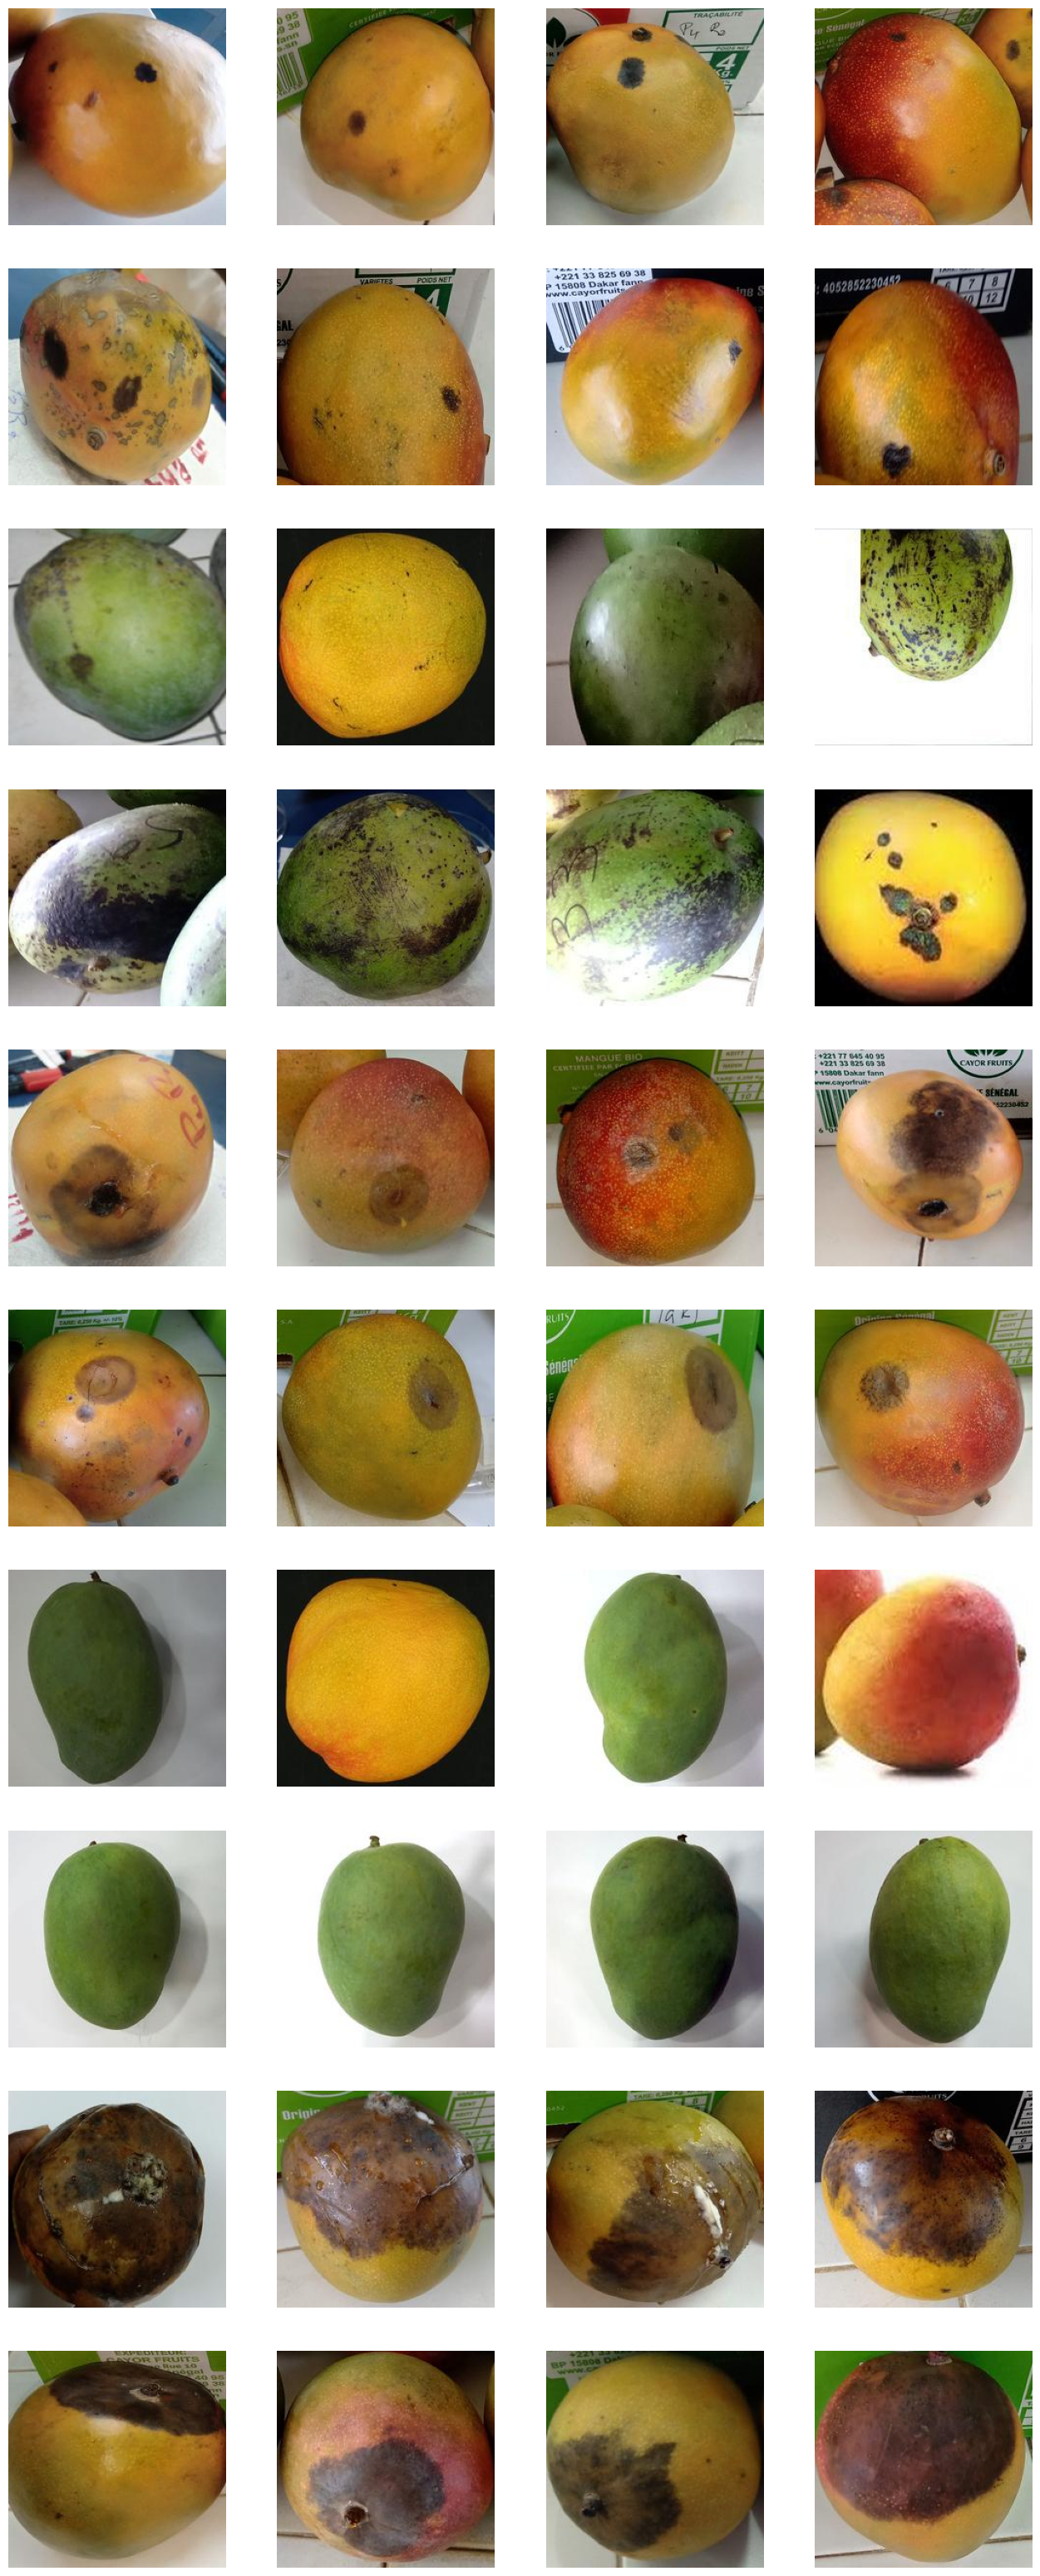

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
a_pix = [os.path.join(a_dir, fname)
                for fname in a_names[pic_index-8:pic_index]]
b_pix = [os.path.join(b_dir, fname)
                for fname in b_names[pic_index-8:pic_index]]
c_pix = [os.path.join(c_dir, fname)
                for fname in c_names[pic_index-8:pic_index]]
d_pix = [os.path.join(d_dir, fname)
                for fname in d_names[pic_index-8:pic_index]]
e_pix = [os.path.join(e_dir, fname)
                for fname in e_names[pic_index-8:pic_index]]

for i, img_path in enumerate(a_pix + b_pix + c_pix + d_pix + e_pix):
  sp = plt.subplot(nrows, ncols, (i % (nrows * ncols)) + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

In [12]:
from sklearn.model_selection import train_test_split
data_dir = './input/MangoFruitDDS/SenMangoFruitDDS_original'
batch_size = 64
epochs = 30
input_shape = (300, 300, 3)
image_paths = []
labels = []

for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    if os.path.isdir(category_dir):
        for image_filename in os.listdir(category_dir):
            if image_filename.endswith('.jpg'):
                image_path = os.path.join(category_dir, image_filename)
                image_paths.append(image_path)
                labels.append(category)
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

In [13]:
len(train_image_paths),len(test_image_paths), len(train_labels), len(test_labels)

(689, 173, 689, 173)

In [14]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': train_image_paths, 'label': train_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': test_image_paths, 'label': test_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

Found 689 validated image filenames belonging to 5 classes.
Found 173 validated image filenames belonging to 5 classes.


In [18]:
history = model.fit(train_generator, epochs=30, steps_per_epoch=8, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/30
8/8 [==============================] - 12s 1s/step - loss: 1.6146 - accuracy: 0.2266 - val_loss: 1.6039 - val_accuracy: 0.1792
Epoch 2/30
8/8 [==============================] - 8s 971ms/step - loss: 1.6438 - accuracy: 0.2374 - val_loss: 1.5983 - val_accuracy: 0.3179
Epoch 3/30
8/8 [==============================] - 8s 1s/step - loss: 1.5691 - accuracy: 0.2969 - val_loss: 1.9172 - val_accuracy: 0.3064
Epoch 4/30
8/8 [==============================] - 8s 1s/step - loss: 1.6733 - accuracy: 0.2757 - val_loss: 1.4775 - val_accuracy: 0.3468
Epoch 5/30
8/8 [==============================] - 8s 1s/step - loss: 1.5120 - accuracy: 0.3662 - val_loss: 1.5469 - val_accuracy: 0.2775
Epoch 6/30
8/8 [==============================] - 8s 1s/step - loss: 1.4632 - accuracy: 0.4085 - val_loss: 1.2083 - val_accuracy: 0.5029
Epoch 7/30
8/8 [==============================] - 8s 1s/step - loss: 1.5347 - accuracy: 0.3702 - val_loss: 1.3296 - val_accuracy: 0.4162
Epoch 8/30
8/8 [=====================

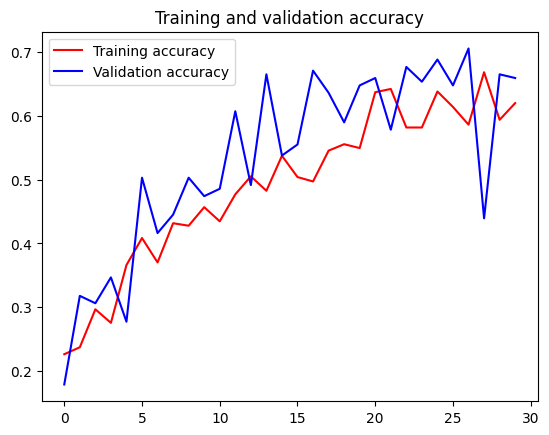

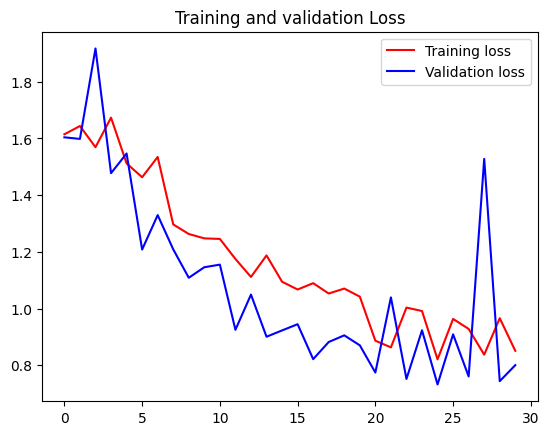

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [20]:
model.save('mango.h5')